Preguntas extra y mejoradas hito 1 para poder aplicar herramientas y no solo EDA (exploratory data analysis)





In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df_cc = pd.read_csv('credit_card_transactions-ibm_v2.csv')
df_users = pd.read_csv('sd254_users.csv')
df_cards = pd.read_csv('sd254_cards.csv')
df_usercc = pd.read_csv("User0_credit_card_transactions.csv")
df_users["User"] = range(0, len(df_users)) # Crear columna User en df_users para index

In [74]:
#Limpieza de datos
df_cc['Amount'] = df_cc['Amount'].str.replace('$', '').astype(float) #dolares a float
df_cc['Hour'] = df_cc['Time'].str.split(':').str[0].astype(int)   #hora:min a hora int
df_cc.drop(columns=['Time'], inplace=True)
df_cc['Is Fraud?'] = df_cc["Is Fraud?"].map({"No": False, "Yes": True})
df_gigante = df_cc.merge(df_users, how="inner", on="User")   #merge de df_cc y df_users

Se calcularán relación entre transacciones fraudulentas y la cantidad de dinero inovlucrada

In [75]:
#Series(string(?)) a float la columna Amount
# cambiar la columna Is Fraud? a booleano
#y dejar solo las columnas Amount y Is Fraud?
#también se ordena por Amount
df_cc_sorted = df_cc[['Amount', 'Is Fraud?']].sort_values(by='Amount').copy().reset_index(drop=True)

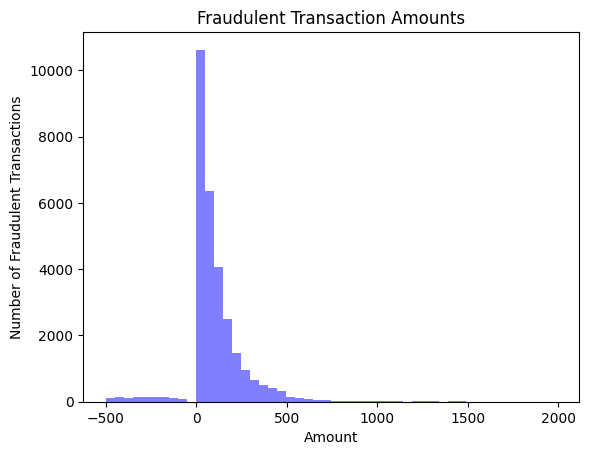

In [76]:
#solo se dejan fraudulentas
df_frauds = df_cc_sorted[df_cc_sorted['Is Fraud?'] == True]
#se filtran menores a2000
df_frauds.loc[:, 'Amount'] = df_frauds[df_frauds['Amount'] < 2000]

#se grafica
plt.hist(df_frauds['Amount'], bins=50, color='blue', alpha=0.5)
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Number of Fraudulent Transactions')

plt.title('Fraudulent Transaction Amounts')
plt.show()

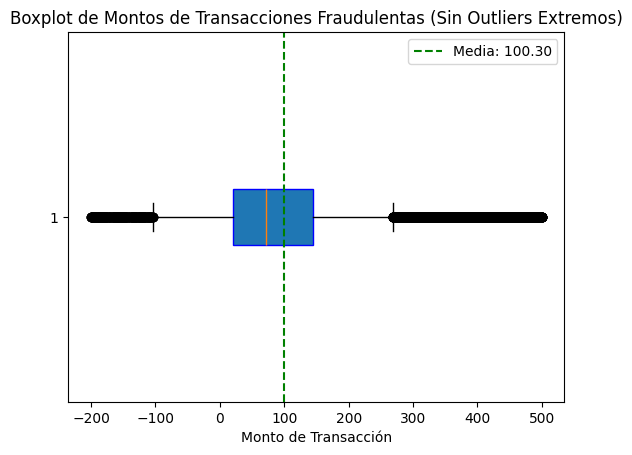

In [77]:
# Filtrar datos dentro de un rango de interés para reducir outliers visibles
filtered_data = df_frauds[(df_frauds['Amount'] >= -200) & (df_frauds['Amount'] <= 500)]

# Crear el boxplot con límites y opciones ajustadas
plt.boxplot(filtered_data['Amount'], vert=False, patch_artist=True, whis=1.0, boxprops=dict(color="blue"))

# Etiquetas y título
plt.xlabel('Monto de Transacción')
plt.title('Boxplot de Montos de Transacciones Fraudulentas (Sin Outliers Extremos)')

# Agregar línea para la media
mean_value = filtered_data['Amount'].mean()
plt.axvline(mean_value, color='green', linestyle='--', label=f'Media: {mean_value:.2f}')
plt.legend()
plt.show()


Se obtiene que los fraudes predominan en rangos pequeños de dinero

Ahora se analizará si es más probable según día del mes, día de la semana, horario

In [78]:
df_cc_times = df_cc.copy()
df_frauds = df_cc_times[df_cc_times['Is Fraud?'] == True]
df_frauds_times = df_frauds[['Year', 'Month', 'Day', 'Hour', 'Is Fraud?']].copy()  #Tabla con fechas de fraudes

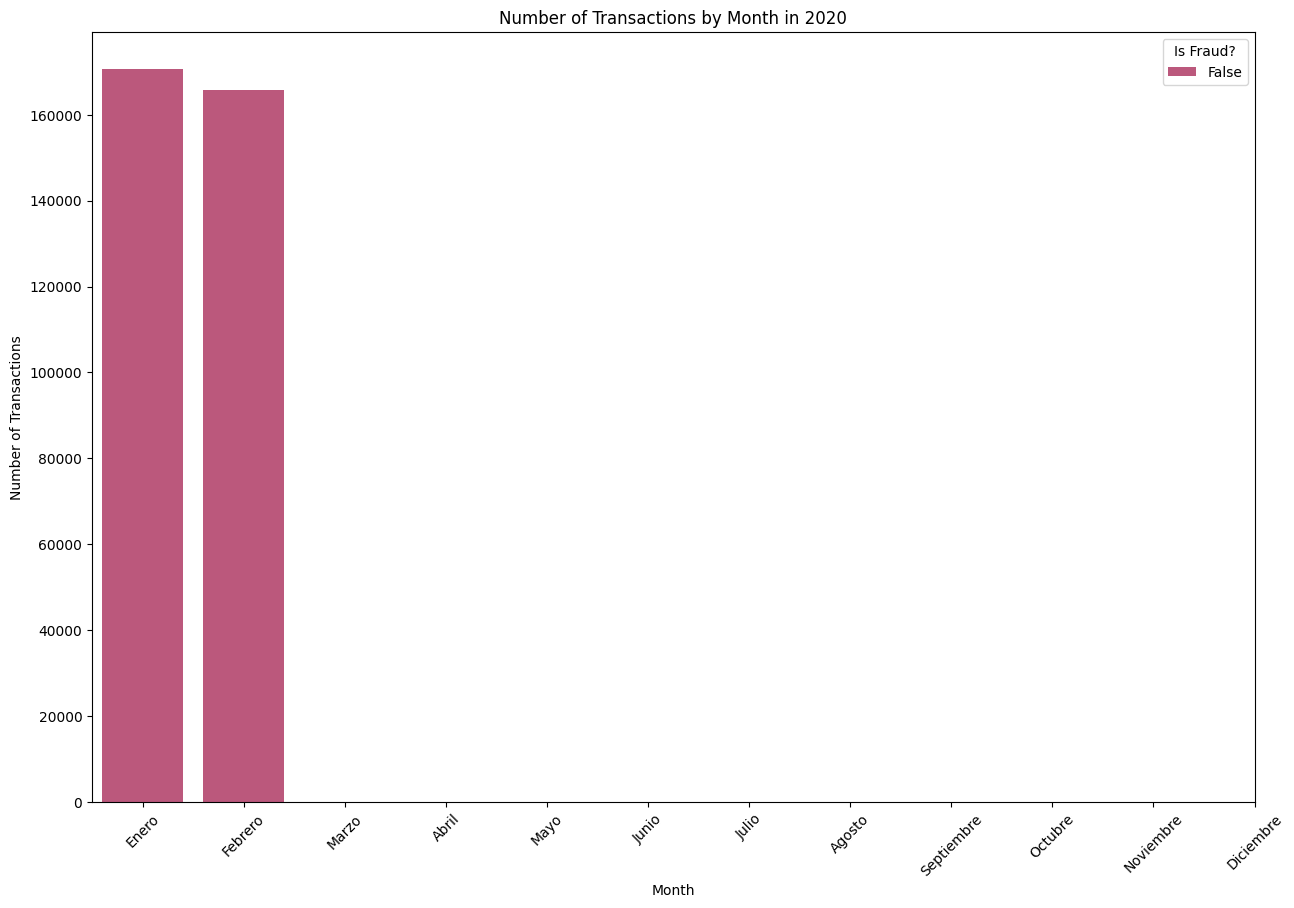

In [79]:
# Transacciones fraudulentas y no fraudulentas por mes en 2020
plt.figure(figsize=(15, 10))
sns.countplot(data=df_cc_times[df_cc_times['Year'] == 2020], x='Month', hue='Is Fraud?', palette='plasma')
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.title('Number of Transactions by Month in 2020')
plt.ylabel('Number of Transactions')  # Añadir el nombre del eje y
plt.xlabel('Month')
plt.legend(title='Is Fraud?')
plt.show()


In [80]:
df_times_swipe = df_cc_times[df_cc_times['Use Chip'] == 'Swipe Transaction']
df_times_chip = df_cc_times[df_cc_times['Use Chip'] == 'Chip Transaction']

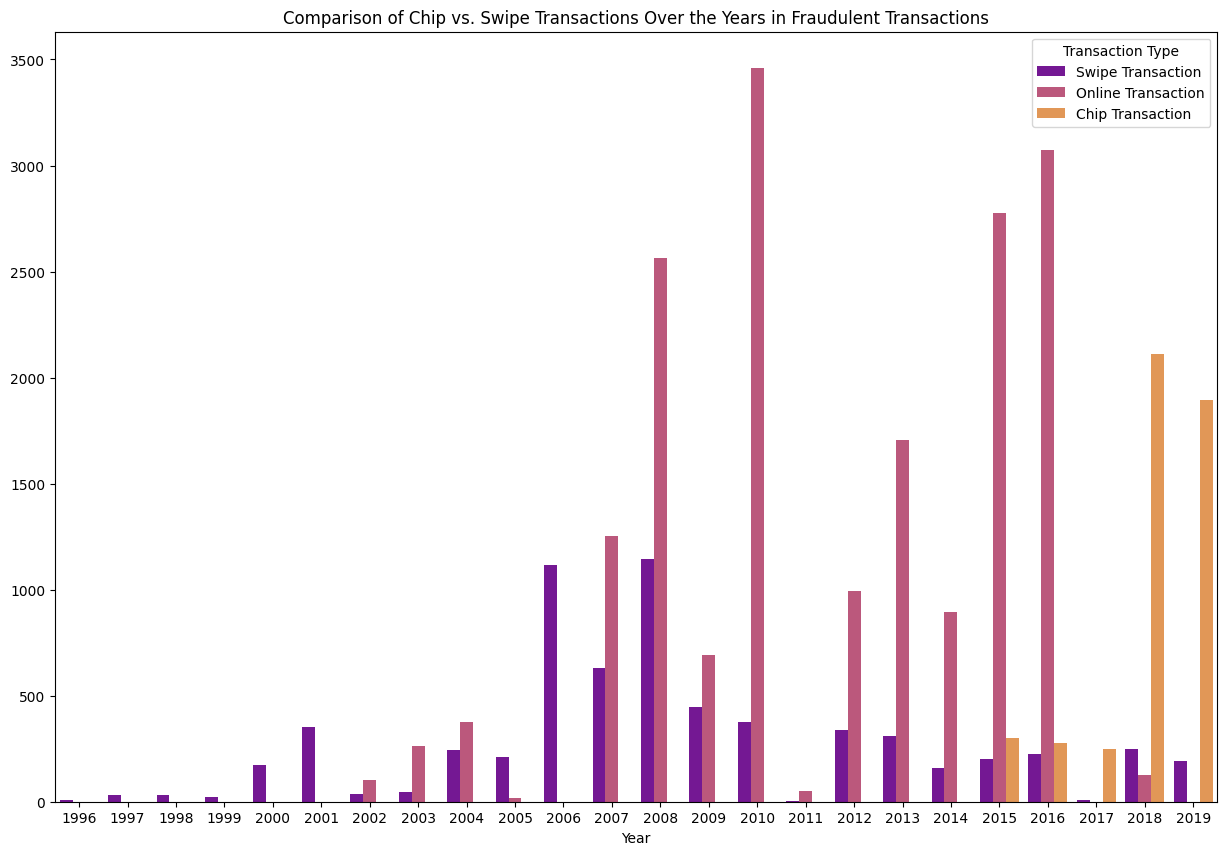

In [81]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_cc_times[df_cc_times['Is Fraud?'] == True], x='Year', hue='Use Chip', palette='plasma')
plt.title('Comparison of Chip vs. Swipe Transactions Over the Years in Fraudulent Transactions')
plt.legend(title='Transaction Type')
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

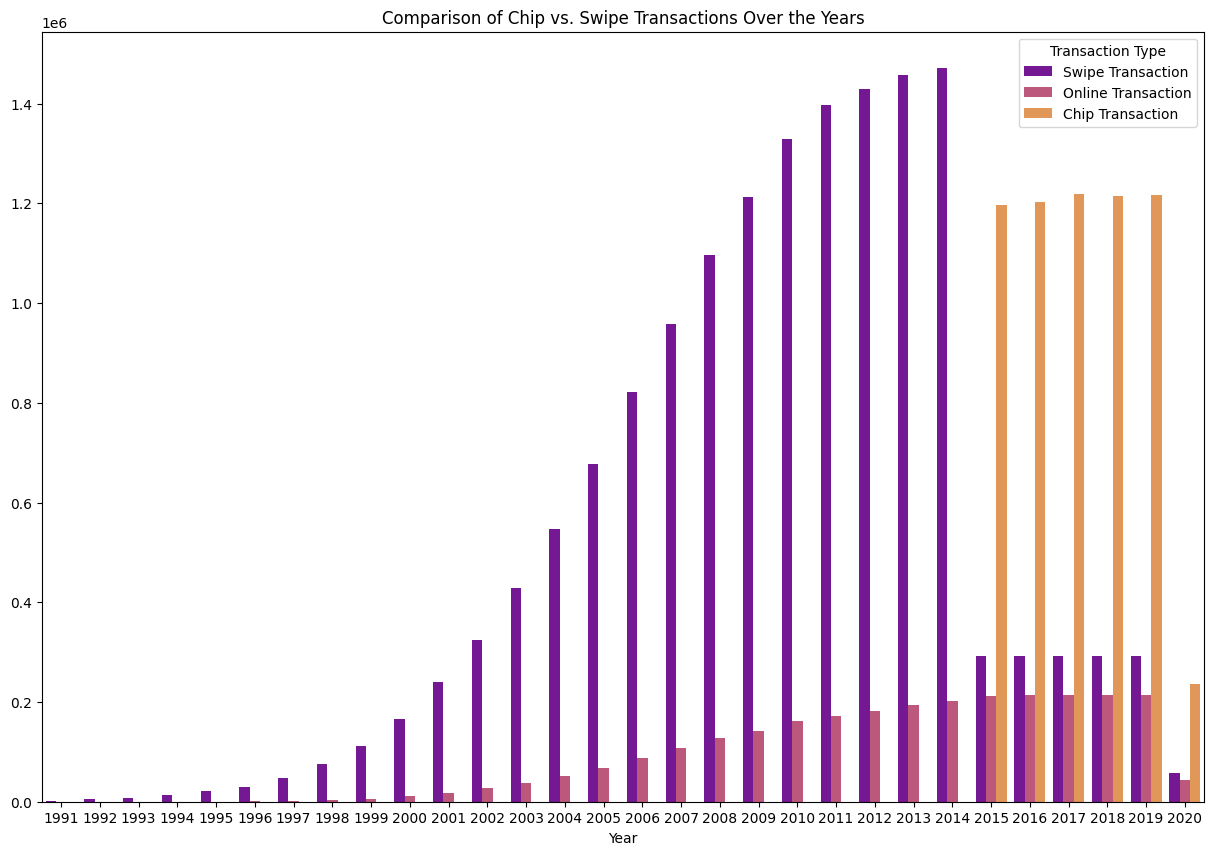

In [82]:


plt.figure(figsize=(15, 10))
sns.countplot(data=df_cc_times, x='Year', hue='Use Chip', palette='plasma')
plt.title('Comparison of Chip vs. Swipe Transactions Over the Years')
plt.legend(title='Transaction Type')
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()


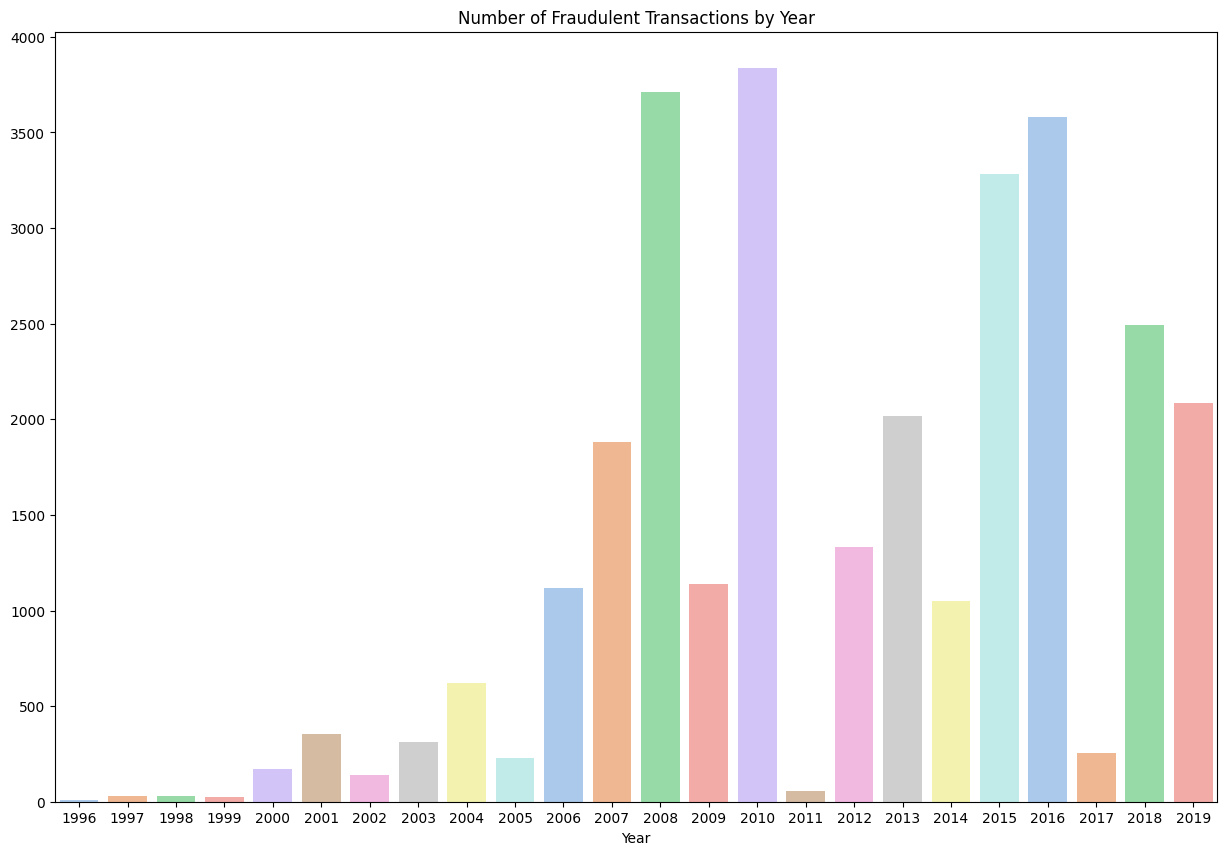

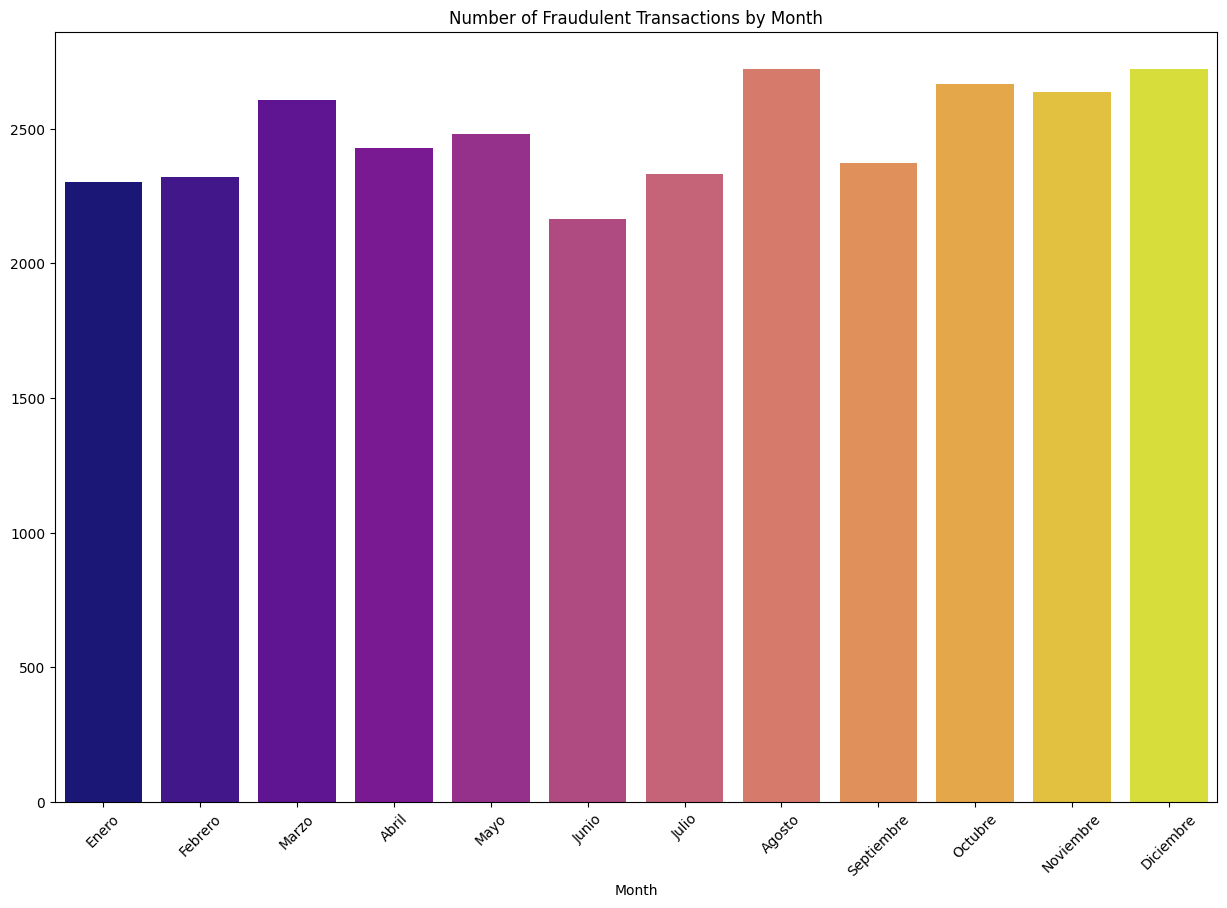

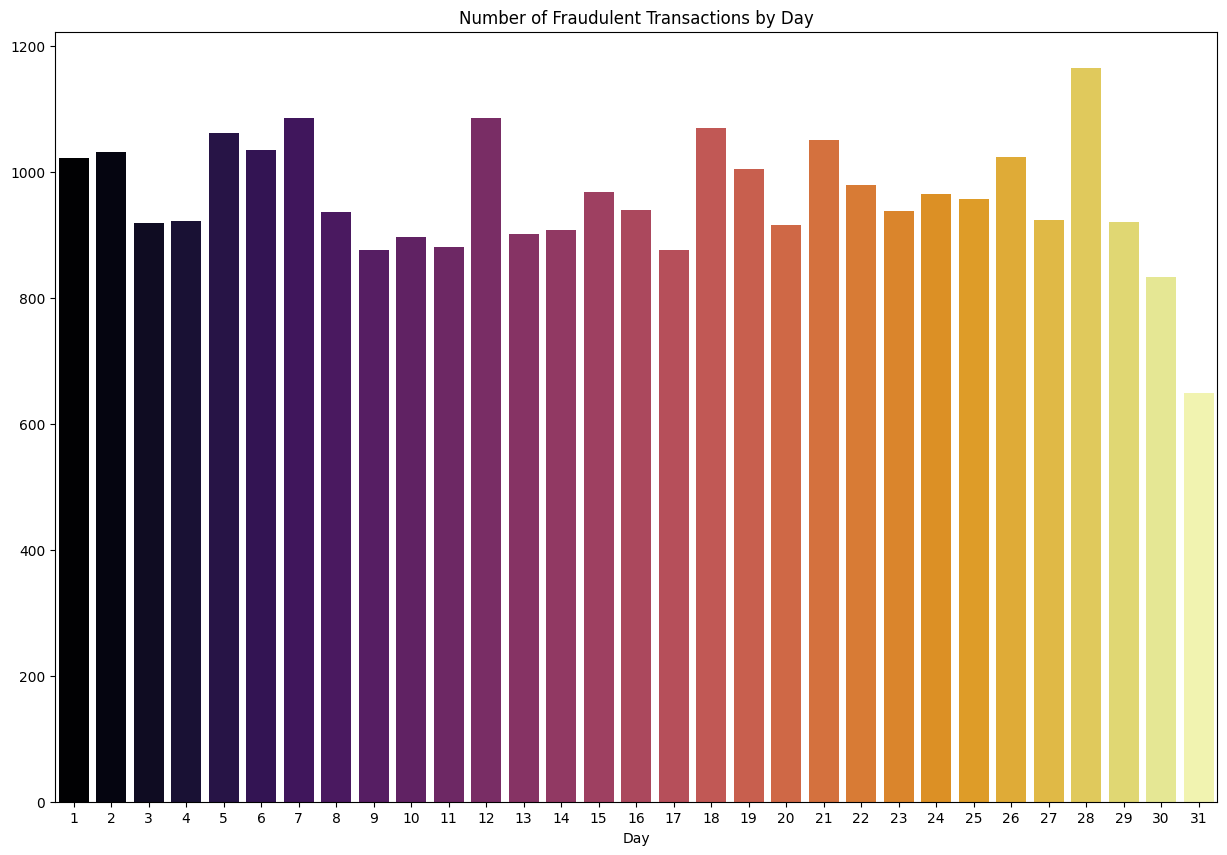

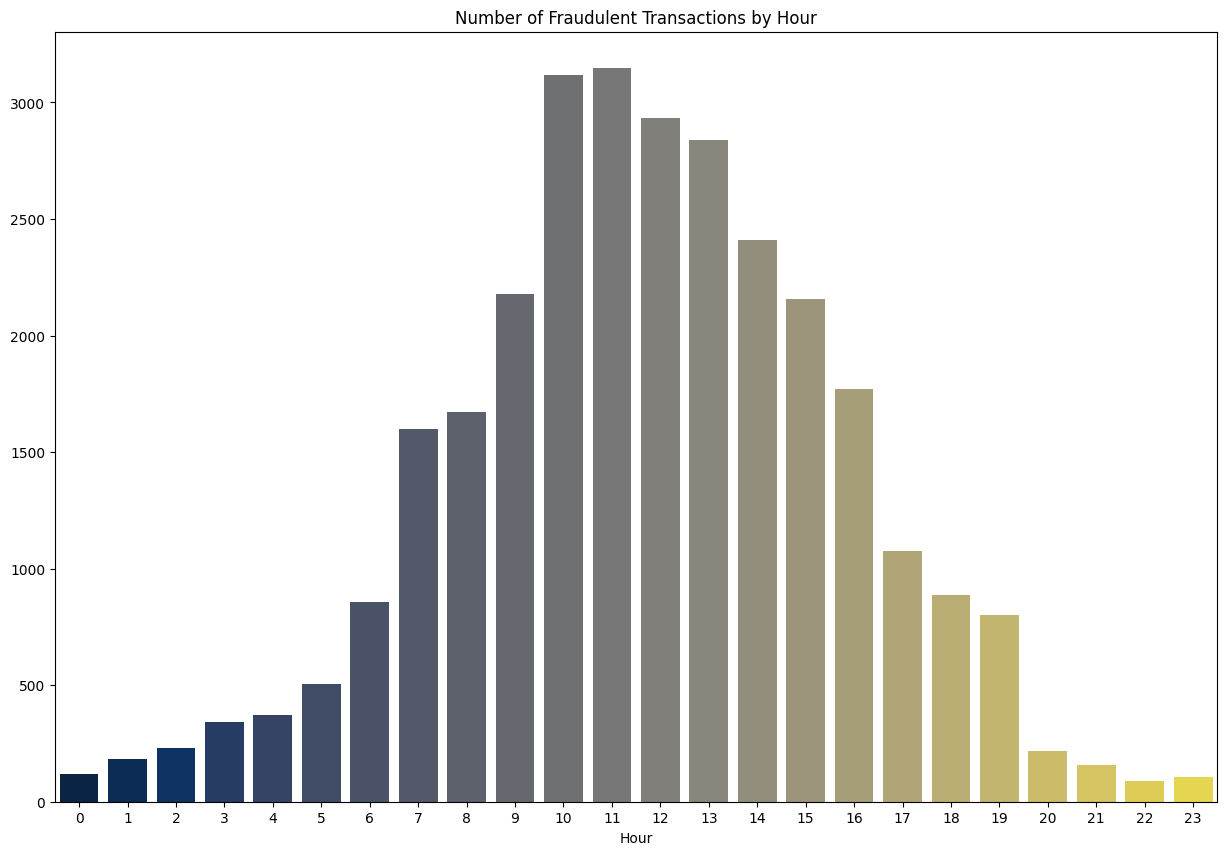

In [83]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds_times, x='Year', hue='Year', palette='pastel', legend=False)
plt.title('Number of Fraudulent Transactions by Year')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds_times, x='Month', hue='Month', palette='plasma', legend=False)
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.title('Number of Fraudulent Transactions by Month')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds_times, x='Day', hue='Day', palette='inferno', legend=False)
plt.title('Number of Fraudulent Transactions by Day')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds_times, x='Hour', hue='Hour', palette='cividis', legend=False)
plt.title('Number of Fraudulent Transactions by Hour')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

Se observa que la hora del día y el año influyen en la cantidad de fraudes

Finalmente se estudiará si el lugar de la transferencia influye en los fraudes

In [84]:
df_ciudades_frauds.count()

np.int64(1972)

In [85]:
list(df_ciudades_frauds.keys())


['Rome',
 'Algiers',
 'Port au Prince',
 'Strasburg',
 'Mexico City',
 'Istanbul',
 'Abuja',
 'Berkeley',
 'Bellevue',
 'Funafuti',
 'Attica',
 'Oakland',
 'Tokyo',
 'Bucyrus',
 'Richmond',
 'Sugarcreek',
 'Los Angeles',
 'Suva',
 'Marion',
 'Las Vegas',
 'New York',
 'Fairfield',
 'Castalia',
 'Sacramento',
 'Miami',
 'San Diego',
 'Emeryville',
 'Loudonville',
 'Saint Paul',
 'San Francisco',
 'Tampa',
 'Bellaire',
 'Phoenix',
 'Green Springs',
 'Vancouver',
 'Portland',
 'Bellville',
 'Orlando',
 'Uniontown',
 'Glendale',
 'Atlantic City',
 'Brooklyn',
 'Wooster',
 'Beech Grove',
 'Pensacola',
 'Bethany',
 'Atlanta',
 'Lakewood',
 'Lincoln Park',
 'Hartley',
 'Howell',
 'Madison',
 'Pflugerville',
 'Avon',
 'Long Beach',
 'Aliso Viejo',
 'Wichita',
 'Winter Park',
 'Springboro',
 'Brentwood',
 'Walnut Creek',
 'El Sobrante',
 'Jackson',
 'Houston',
 'Roseville',
 'Union City',
 'Milton',
 'Hamilton',
 'Harwood',
 'Morgan Hill',
 'Kennesaw',
 'Waianae',
 'Louisville',
 'Anchorage',
 

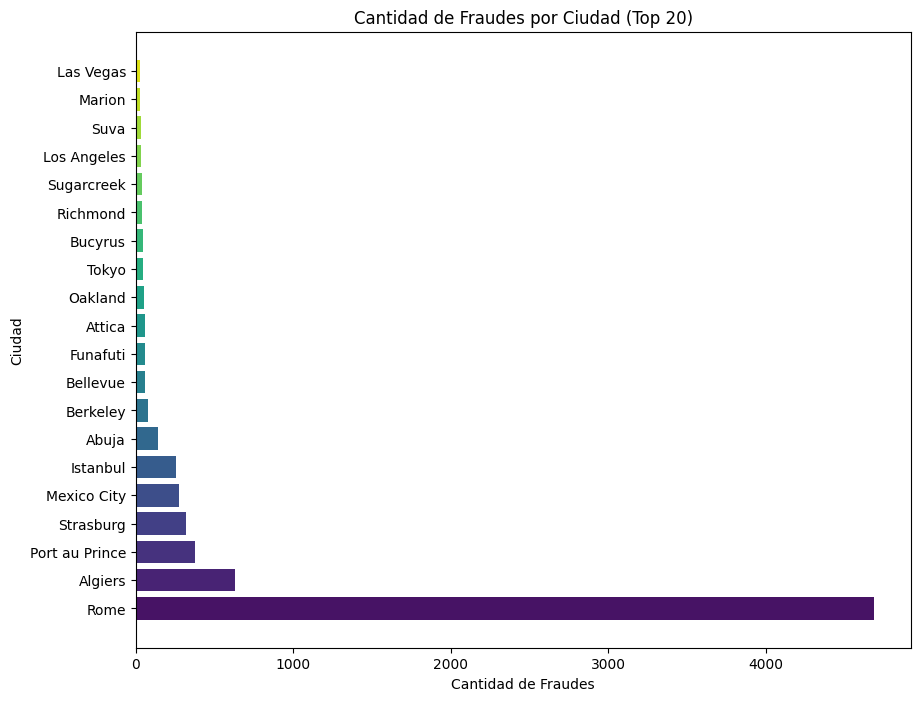

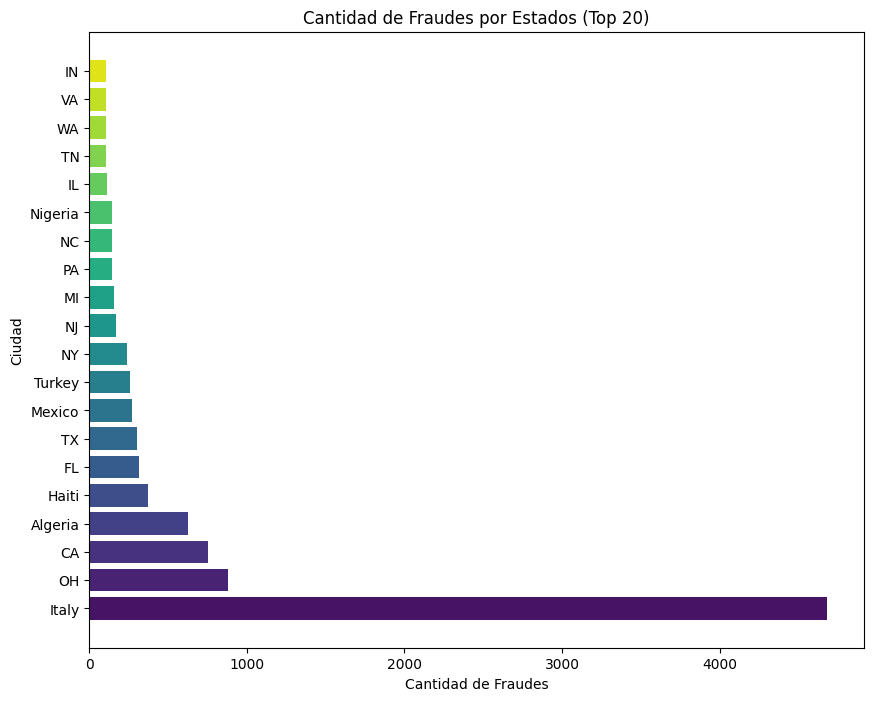

In [86]:
df_ciudades_frauds = df_frauds.groupby('Merchant City')['Is Fraud?'].sum().sort_values(ascending=False)

df_ciudades_frauds = df_ciudades_frauds.iloc[1:]  # Eliminar Online

top_20_ciudades = df_ciudades_frauds.head(20)

plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_ciudades.index, top_20_ciudades.values, color=sns.color_palette('viridis', 20))
plt.xlabel('Cantidad de Fraudes')
plt.ylabel('Ciudad')
plt.title('Cantidad de Fraudes por Ciudad (Top 20)')

plt.show()

df_estados_frauds = df_frauds.groupby('Merchant State')['Is Fraud?'].sum().sort_values(ascending=False)

top_20_estados = df_estados_frauds.head(20)

plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_estados.index, top_20_estados.values, color=sns.color_palette('viridis', 20))
plt.xlabel('Cantidad de Fraudes')
plt.ylabel('Ciudad')
plt.title('Cantidad de Fraudes por Estados (Top 20)')

plt.show()




Sí, se ve una correlación entre fraudes y ciudades/estados

Veremos si hacer transacciones extranjero (lugar fuera ciudad/estado del que el usuario vive)

In [87]:
df_user_location = df_gigante[['User', 'Merchant City', 'Merchant State', 'City', 'State', 'Is Fraud?']]

C:\Users\aleja\AppData\Local\Temp\ipykernel_13400\1044937831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_location.loc[:, 'Is Foreign?'] = df_user_location['Merchant State'] != df_user_location['State']


Is Foreign?
False    0.018923
True     0.533362
Name: Is Fraud?, dtype: float64


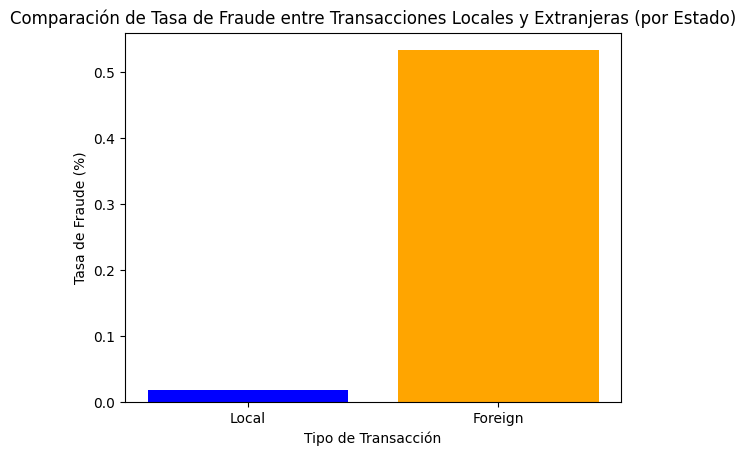

In [88]:
df_user_location.loc[:, 'Is Foreign?'] = df_user_location['Merchant State'] != df_user_location['State']

#Se calculará la tasa de fraude
foreign_fraud_rate = df_user_location.groupby('Is Foreign?')['Is Fraud?'].mean() * 100
print(foreign_fraud_rate)

# Crear el gráfico de barras
plt.bar(['Local', 'Foreign'], foreign_fraud_rate, color=['blue', 'orange'])
plt.xlabel('Tipo de Transacción')
plt.ylabel('Tasa de Fraude (%)')
plt.title('Comparación de Tasa de Fraude entre Transacciones Locales y Extranjeras (por Estado)')
plt.show()

Ahora se anazizará que caracteristicas de la tarjeta tiene relación con los fraudes

In [89]:
df_cards_chikita = df_cards[['User', 'CARD INDEX', 'Year PIN last Changed', 'Card on Dark Web', 'Has Chip']].copy()
df_cards_chikita['Card on Dark Web'] = df_cards_chikita['Card on Dark Web'].map({"No": False, "Yes": True})
df_cards_chikita['Has Chip'] = df_cards_chikita['Has Chip'].map({"NO": False, "YES": True})


df_cc_chikito = df_cc[['User', 'Card', 'Year', 'Is Fraud?']]

df_cc_cards = df_cc_chikito.merge(df_cards_chikita, how='inner', left_on=['User', 'Card'], right_on=['User', 'CARD INDEX'])

In [90]:
# Número total de fraudes
df_frauds = df_cc_cards[df_cc_cards['Is Fraud?'] == True]
total_fraudes = df_frauds.shape[0]

# Número de fraudes con tarjetas en dark web y sin dark web
fraudes_darkweb = df_frauds[df_frauds['Card on Dark Web'] == True].shape[0]
fraudes_no_darkweb = df_frauds[df_frauds['Card on Dark Web'] == False].shape[0]

print(f'Número total de fraudes: {total_fraudes}')
print(f'Número de fraudes con tarjetas en dark web: {fraudes_darkweb}')
print(f'Número de fraudes con tarjetas no en dark web: {fraudes_no_darkweb}')


Número total de fraudes: 29757
Número de fraudes con tarjetas en dark web: 0
Número de fraudes con tarjetas no en dark web: 29757


Se observa que no hay tarjetas en la dark web que tengan fraude, así que no tiene relación

Por último si tener chip en la tarjeta afecta

Has Chip
False    0.138912
True     0.198855
Name: Is Fraud?, dtype: float64


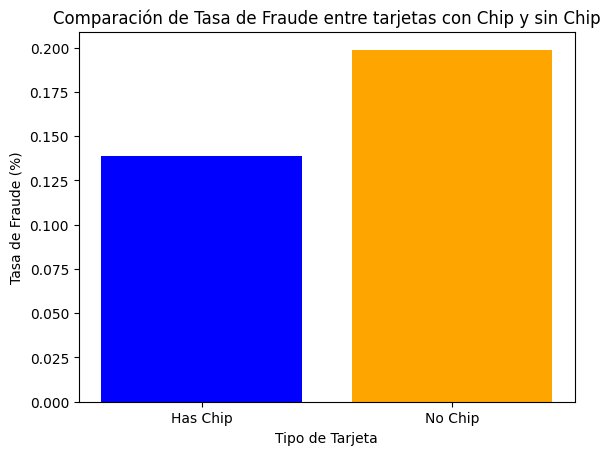

In [91]:
# Calcular la tasa de fraude para tarjetas con chip y sin chip desde el añ0 2015
fraud_rate_chip = df_cc_cards[df_cc_cards['Year'] == 2015].groupby('Has Chip')['Is Fraud?'].mean() * 100

# Mostrar la tasa de fraude para cada tipo de tarjeta
print(fraud_rate_chip)

# Crear el gráfico de barras
plt.bar(['Has Chip', 'No Chip'], fraud_rate_chip, color=['blue', 'orange'])
plt.xlabel('Tipo de Tarjeta')
plt.ylabel('Tasa de Fraude (%)')
plt.title('Comparación de Tasa de Fraude entre tarjetas con Chip y sin Chip')
plt.show()

Has Chip
False    0.113095
True     0.123029
Name: Is Fraud?, dtype: float64


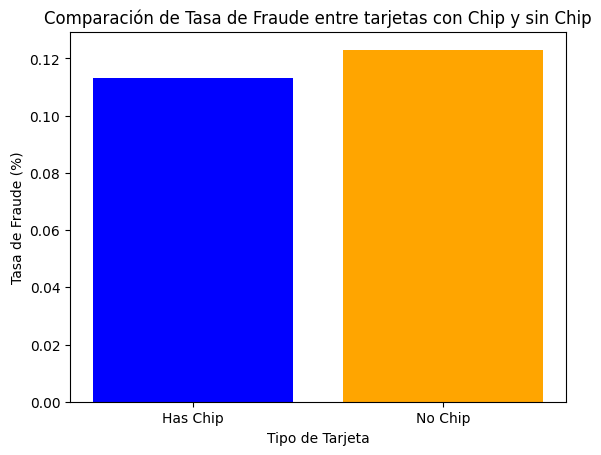

In [92]:
# Calcular la tasa de fraude para tarjetas con chip y sin chip
fraud_rate_chip = df_cc_cards.groupby('Has Chip')['Is Fraud?'].mean() * 100

# Mostrar la tasa de fraude para cada tipo de tarjeta
print(fraud_rate_chip)

# Crear el gráfico de barras
plt.bar(['Has Chip', 'No Chip'], fraud_rate_chip, color=['blue', 'orange'])
plt.xlabel('Tipo de Tarjeta')
plt.ylabel('Tasa de Fraude (%)')
plt.title('Comparación de Tasa de Fraude entre tarjetas con Chip y sin Chip')
plt.show()

No afecta.

Nuevas preguntas enfocadas a lo que se ha aprendido en el curso de mineria


-¿Cómo impacta el balance de clases en la precisión de los modelos de predicción de fraude?” (ahí usamos los scores)

-¿Qué combinaciones de características están más asociadas con transacciones fraudulentas?

gpt m dijo: 

 - **Método**: Reglas de asociación
 
 - **Descripción**: Usa algoritmos de minería de datos como el Apriori o FP-Growth para identificar patrones frecuentes de características en las transacciones fraudulentas. Podrías buscar combinaciones como:
Rango de montos + Edad del usuario + Hora del día
Estado/ciudad de transacción + Extranjero o no + Año
 
 - **Objetivo:** Identificar combinaciones de características que ocurren frecuentemente en transacciones fraudulentas. Esto podría darte información sobre qué factores tienden a aparecer juntos en casos de fraude.
 
 - **Ejemplo:** Puedes encontrar reglas como "si la transacción es en un estado diferente al de residencia y ocurre durante la noche, entonces es más probable que sea fraude".
 


-¿Cómo afecta el balanceo de datos en el rendimiento de los modelos predictivos de fraude?
 
 - Descripción: Puedes comparar el rendimiento de modelos entrenados con los datos originales y con datos balanceados (utilizando técnicas como SMOTE o undersampling). Esto te permitirá observar si balancear los datos mejora la capacidad del modelo para identificar fraudes.
 
 - Método: Entrena varios modelos (como árboles de decisión, Random Forest, o redes neuronales) con y sin técnicas de balanceo. Evalúa el rendimiento con métricas como precisión, recall, y F1.
 
 - Objetivo: Verificar si el balanceo de datos ayuda al modelo a mejorar la identificación de fraudes y reducir los falsos negativos.


-“¿Cuál es la tasa óptima de balance entre fraudes y no fraudes para maximizar la precisión sin aumentar los falsos positivos?”

 - Descripción: Esta pregunta busca identificar el punto óptimo de balance para tu dataset. En lugar de hacer un balance perfecto (igual número de fraudes y no fraudes), puedes probar con diferentes niveles de balanceo (por ejemplo, 10% fraudes, 20% fraudes) y ver cuál ofrece el mejor rendimiento en términos de precisión y recall.
 
 - Método: Crea versiones del dataset con diferentes niveles de balance y entrena un modelo en cada versión. Observa cómo varían las métricas a medida que cambias el balance.
 
 - Objetivo: Encontrar el balance óptimo que maximice la identificación de fraudes sin comprometer demasiado el número de falsos positivos.



-“¿Qué características contribuyen más a la separación entre transacciones fraudulentas y no fraudulentas?”
 
 - Objetivo: Al observar la distancia entre clusters de fraude y no fraude, puedes identificar las características que generan esta separación. Por ejemplo, si al usar ciertas variables encuentras una buena separación entre fraudes y no fraudes, eso indica que esas características son útiles para diferenciar las dos clases.
 
 - Resultado Esperado: Con métricas como la distancia entre centroides o el índice de silueta, puedes medir el poder de separación de las características. Esto te ayuda a saber qué características son más importantes y podrían ser útiles en un modelo de clasificación supervisada en el futuro.


Las features que más afectan q obtuvimos en el EDA son

Si fue online, Amount, Edad usuario, el año y la hora del día que se hace la transacción, el estado y ciudad, si es que la transacción se hizo en el extranjero.     

In [93]:
df_gigante.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'Hour', 'Person', 'Current Age',
       'Retirement Age', 'Birth Year', 'Birth Month', 'Gender', 'Address',
       'Apartment', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude',
       'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt',
       'FICO Score', 'Num Credit Cards'],
      dtype='object')

In [94]:
!pip install scikit-learn pandas

In [95]:
# Construccion de un modelo de clasificación
from sklearn.model_selection import train_test_split

df_model = df_gigante.head(1000000).copy()

X = df_model.drop(columns=['Is Fraud?', 'User', 'Address', 'Latitude', 'Longitude', 'Errors?', 'Person', 'Apartment', 'City', 'State', 'Merchant City', 'Merchant State', 'Use Chip', 'Gender', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt'])
y = df_model['Is Fraud?']

# Primero separamos los datos de entrenamiento y validación/test
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Luego separamos los datos de validación y pruebas                                       0.5 x 0.3 = 0.15
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0, stratify=y_val_and_test)



In [96]:

merchant_city = ['Rome',
 'Algiers',
 'Port au Prince',
 'Strasburg',
 'Mexico City',
 'Istanbul',
 'Abuja',
 'Berkeley',
 'Bellevue',
 'Funafuti',
 'Attica',
 'Oakland',
 'Tokyo',
 'Bucyrus',
 'Richmond',
 'Sugarcreek',
 'Los Angeles',
 'Suva',
 'Marion',
 'Las Vegas',
 'New York',
 'Fairfield',
 'Castalia',
 'Sacramento',
 'Miami',
 'San Diego',
 'Emeryville',
 'Loudonville',
 'Saint Paul',
 'San Francisco',
 'Tampa',
 'Bellaire',
 'Phoenix',
 'Green Springs',
 'Vancouver',
 'Portland',
 'Bellville',
 'Orlando',
 'Uniontown',
 'Glendale',
 'Atlantic City',
 'Brooklyn',
 'Wooster',
 'Beech Grove',
 'Pensacola',
 'Bethany',
 'Atlanta',
 'Lakewood',
 'Lincoln Park',
 'Hartley',
 'Howell',
 'Madison',
 'Pflugerville',
 'Avon',
 'Long Beach',
 'Aliso Viejo',
 'Wichita',
 'Winter Park',
 'Springboro',
 'Brentwood',
 'Walnut Creek',
 'El Sobrante',
 'Jackson',
 'Houston',
 'Roseville',
 'Union City',
 'Milton',
 'Hamilton',
 'Harwood',
 'Morgan Hill',
 'Kennesaw',
 'Waianae',
 'Louisville',
 'Anchorage',
 'Independence',
 'Memphis',
 'Brownsburg',
 'Denison',
 'Santa Barbara',
 'Pasadena',
 'Berlin Heights',
 'Elk Grove',
 'Norwalk',
 'Alexandria',
 'Alpine',
 'Frisco',
 'Vacaville',
 'Chandler',
 'Spearfish',
 'Tacoma',
 'Corona',
 'Clinton',
 'Scottsdale',
 'Farmington',
 'Hallandale',
 'West Chester',
 'Santa Clara',
 'Arlington',
 'Denver',
 'Gaithersburg',
 'Hanover',
 'Colorado Springs',
 'Greenville',
 'Chula Vista',
 'Fort Smith',
 'Powell',
 'Cordova',
 'Eight Mile',
 'Lutz',
 'Maple Valley',
 'Mc Queeney',
 'Mechanicsville',
 'Modesto',
 'Mooresburg',
 'New Philadelphia',
 'Billings',
 'Newport News',
 'Rochester',
 'Seattle',
 'Springfield',
 'Upland',
 'White Plains',
 'Staten Island',
 'Danville',
 'Bloomville',
 'Auburn',
 'Austell',
 'Fort Myers',
 'Fort Mill',
 'Bay City',
 'Pinellas Park',
 'Yonkers',
 'Cary',
 'Cicero',
 'Chicago',
 'Midway',
 'Highland',
 'Fort Worth',
 'Charlotte',
 'Milan',
 'Chatham',
 'Detroit',
 'Indianapolis',
 'Glen Allen',
 'Mansfield',
 'Oxford',
 'Dallas',
 'Franklin',
 'Ernul',
 'Panama City Beach',
 'Coopersville',
 'Fort Lauderdale',
 'Imperial',
 'Dickson',
 'Newport Beach',
 'Mcconnell Afb',
 'Chambersburg',
 'Medford',
 'Melbourne Beach',
 'Flagstaff',
 'Pompano Beach',
 'Avondale',
 'Gulf Breeze',
 'Rancho Cucamonga',
 'Denton',
 'Rio Rancho',
 'Lancaster',
 'Spearman',
 'Stanton',
 'Arcadia',
 'Grand Island',
 'Fremont',
 'Kaneohe',
 'Larwill',
 'Tucson',
 'Kolkata',
 'Indio',
 'Annapolis',
 'Wesley Chapel',
 'Canton',
 'Butte Des Morts',
 'East Hanover',
 'Moreno Valley',
 'Newark',
 'Hialeah',
 'North Bergen',
 'North Little Rock',
 'Novi',
 'Oak Harbor',
 'Ogden',
 'Okay',
 'Laurel',
 'Johnsonburg',
 'Pearl City',
 'Peoria',
 'Pevely',
 'Claremont',
 'Campbell',
 'Albuquerque',
 'Hartford',
 'Portageville',
 'Bokeelia',
 'Hope Mills',
 'High Ridge',
 'Redwood City',
 'Camden',
 'Ridgewood',
 'Camp Hill',
 'Riverside',
 'Grand Rapids',
 'Hendersonville',
 'Henderson',
 'Lake Saint Louis',
 'Chester',
 'San Bernardino',
 'Blue Lake',
 'Concord',
 'San Jose',
 'San Leandro',
 'San Mateo',
 'San Rafael',
 'Sandston',
 'Carmel',
 'Brighton',
 'Savage',
 'Jeromesville',
 'Lincoln',
 'Shelby',
 'Smyrna',
 'Fresno',
 'Cincinnati',
 'Spirit Lake',
 'Kirkland',
 'Fairfax Station',
 'Hampton',
 'Baltimore',
 'Durham',
 'Bristol',
 'Sugarloaf',
 'Holdenville',
 'Manteca',
 'Dover',
 'Temecula',
 'Margaret',
 'Troy',
 'Greenwood',
 'Appleton',
 'Hamtramck',
 'Universal City',
 'Lynnwood',
 'Butler',
 'Pomona',
 'Germantown',
 'Midland',
 'Warners',
 'Washington',
 'Midlothian',
 'Minneapolis',
 'West Creek',
 'West Jefferson',
 'Columbus',
 'Whitehall',
 'Bronx',
 'Hayward',
 'Akron',
 'Albany',
 'Albertville',
 'Daly City',
 'Howe',
 'Little Neck',
 'Austin',
 'Avoca',
 'Crestline',
 'Morrisville',
 'Moselle',
 'Mount Pleasant',
 'Murrieta',
 'Myrtle Beach',
 'Navarre',
 'Neola',
 'New Braunfels',
 'New Haven',
 'New Kensington',
 'New Llano',
 'New Palestine',
 'Bainbridge',
 'New Stanton',
 'Kyle',
 'Finchville',
 'Gardena',
 'Casselberry',
 'Georgetown',
 'Batesville',
 'North Walpole',
 'Killeen',
 'Columbia',
 'Lakeside',
 'Challis',
 'Beaverton',
 'Oberlin',
 'Cottage Hills',
 'Leander',
 'Olathe',
 'Olmito',
 'Belvedere Tiburon',
 'Oshkosh',
 'Ben Lomond',
 'Pacific Junction',
 'Palmetto',
 'Downey',
 'Papillion',
 'Park City',
 'Chapel Hill',
 'Fleming Island',
 'Pelham',
 'Penhook',
 'Penryn',
 'Highland Park',
 'Duluth',
 'Perrysville',
 'Highlands',
 'Dunbar',
 'Birmingham',
 'Lebanon',
 'Plymouth',
 'Black Diamond',
 'Lawrence',
 'Port Chester',
 'Glenwood',
 'Hilton Head Island',
 'Harrisburg',
 'Boston',
 'Quincy',
 'Raleigh',
 'Bourbon',
 'Chico',
 'Aberdeen',
 'Bradenton',
 'Ridgely',
 'Conway',
 'Fairfax',
 'Ripley',
 'Brandywine',
 'Riverview',
 'Roanoke',
 'Indian Trail',
 'Citrus Heights',
 'Rosedale',
 'Cook',
 'Roswell',
 'Brownsville',
 'Bryant',
 'Saint Peters',
 'Saint Petersburg',
 'Salem',
 'Kapolei',
 'Cramerton',
 'Fort Lee',
 'Cleveland',
 'Grand Prairie',
 'Clifton',
 'Burney',
 'Dayton',
 'Hatfield',
 'Abingdon',
 'Sauk Rapids',
 'Fort Sill',
 'Honolulu',
 'Camby',
 'Seguin',
 'Severna Park',
 'Crumpler',
 'Shelbyville',
 'Silver City',
 'Silver Spring',
 'Smithville',
 'Lathrop',
 'Somerville',
 'South Gate',
 'Southern Pines',
 'Inglewood',
 'El Cerrito',
 'La Mesa',
 'Spring Valley',
 'Crystal Springs',
 'Lorena',
 'Zeeland',
 'Fostoria',
 'Stoughton',
 'Alexander',
 'Strongsville',
 'Loves Park',
 'Fountain',
 'Sun City',
 'Sunnyvale',
 'Superior',
 'Levittown',
 'Havelock',
 'Manakin Sabot',
 'Dade City',
 'Thackerville',
 'Thomasville',
 'Tiffin',
 'Foxboro',
 'Larchmont',
 'Anaheim',
 'Union',
 'Marietta',
 'Jamaica',
 'Mary Esther',
 'Massillon',
 'Sycamore',
 'Valencia',
 'Valley Village',
 'Kenmore',
 'Vanleer',
 'Versailles',
 'Virginia Beach',
 'Vista',
 'Mechanicsburg',
 'Elmira',
 'Carlisle',
 'Warren',
 'Leo',
 'Wayne',
 'Waynesboro',
 'Dearborn Heights',
 'Mendham',
 'Meridian',
 'West Henrietta',
 'Cortland',
 'Carlsbad',
 'Miami Beach',
 'Intercession City',
 'Williamsburg',
 'Winona Lake',
 'Carrollton',
 'Winterville',
 'Delray Beach',
 'Jersey City',
 'Jerseyville',
 'Minersville',
 'Astoria',
 'Yakima',
 'Apollo Beach',
 'Apopka',
 'Freeport',
 'Darien',
 'Medina',
 'Fresh Meadows',
 'Decatur',
 'Menasha',
 'Armada',
 'Mentor',
 'Del Mar',
 'Mesa',
 'Metairie',
 'Fruitland Park',
 'Ft Mitchell',
 'Fullerton',
 'Michigantown',
 'Middle Point',
 'Middletown',
 'Aurora',
 'Depew',
 'Bahama',
 'Henrico',
 'Mills',
 'Millstadt',
 'Millwood',
 'Creston',
 'Minden',
 'Johnston',
 'Banner Elk',
 'Mira Loma',
 'Johnstown',
 'Geismar',
 'Jonesboro',
 'Joplin',
 'Morristown',
 'Battle Creek',
 'Getzville',
 'Mount Crawford',
 'Mount Holly',
 'Landenberg',
 'Mount Vernon',
 'Mountain View',
 'Munford',
 'Murrayville',
 'Bayville',
 'Muskegon',
 'Bean Station',
 'Naples',
 'Hessel',
 'Hewlett',
 'Beavercreek',
 'New Cumberland',
 'New Deal',
 'Doswell',
 'Douglas',
 'New Lebanon',
 'Belews Creek',
 'Downers Grove',
 'Belmont',
 'Kailua',
 'New Waterford',
 'Doylestown',
 'Gladwin',
 'Newport',
 'Drums',
 'Dubberly',
 'Newton',
 'Newton Grove',
 'Niceville',
 'Norfolk',
 'Blacklick',
 'North Charleston',
 'Durant',
 'North Palm Beach',
 'North Tonawanda',
 'Glenn Dale',
 'Northville',
 'Glenrock',
 'Hilo',
 'Eagle Grove',
 'Bon Aqua',
 'Oakdale',
 'Eagle Mountain',
 'Glyndon',
 'Ocala',
 'Ocean Isle Beach',
 'Oceanside',
 'Bothell',
 'Kannapolis',
 'Bozeman',
 'Oldsmar',
 'Ho Ho Kus',
 'Omaha',
 'Opelika',
 'Oradell',
 'Orange Park',
 'Orangevale',
 'East Elmhurst',
 'Hobbs',
 'Brandon',
 'Ozone Park',
 'East Grand Forks',
 'Palm Bay',
 'Palm Beach Gardens',
 'Breda',
 'Panama City',
 'Hoboken',
 'Kansas',
 'Bridgeport',
 'Parkers Prairie',
 'Parma',
 'Bridgeview',
 'Bronxville',
 'Brookfield',
 'Brooksville',
 'East Northport',
 'Brownwood',
 'East Peoria',
 'Perrysburg',
 'Lawrenceville',
 'Petaluma',
 'Petersburg',
 'La Marque',
 'Grand Haven',
 'Philadelphia',
 'Eastlake',
 'Bumpass',
 'Plano',
 'Pleasanton',
 'Pleasantville',
 'Bunnell',
 'Pomfret',
 'Burlingame',
 'Burnham',
 'Port Allen',
 'Katy',
 'Port Orange',
 'Edmond',
 'Bushland',
 'Edmonds',
 'Potts Camp',
 'Poway',
 'El Cajon',
 'Cabazon',
 'La Mirada',
 'El Segundo',
 'Ravenna',
 'Raywick',
 'Reading',
 'Redmond',
 'Grawn',
 'Renner',
 'Reno',
 'Renton',
 'Campo',
 'Richardson',
 'Elyria',
 'Ridgeland',
 'Carlos',
 'Hugo',
 'Carson City',
 'Greenfield',
 'Riverdale',
 'Cartwright',
 'Greensboro',
 'Encino',
 'Erie',
 'Rock Hill',
 'Cedar Knolls',
 'Cedar Rapids',
 'Rosemount',
 'Centerville',
 'Escondido',
 'Round Rock',
 'Rowlett',
 'Largo',
 'Safety Harbor',
 'Saint Amant',
 'Saint Ann',
 'Saint Charles',
 'Saint Clair Shores',
 'Saint George',
 'Estero',
 'Huntington Park',
 'Chantilly',
 'Hurst',
 'Salinas',
 'Sammamish',
 'San Antonio',
 'Charleston',
 'Kent',
 'Cherry Valley',
 'Guilderland',
 'Chetek',
 'San Lorenzo',
 'Chevy Chase',
 'Indialantic',
 'San Ysidro',
 'Churchville',
 'Sanford',
 'Santa Ana',
 'Indiana',
 'Fall River Mills',
 'Sarasota',
 'Indianola',
 'Lafayette',
 'Scarsdale',
 'Schertz',
 'Clayton',
 'Scranton',
 'Sea Isle City',
 'Farmingville',
 'Seffner',
 'Clive',
 'Clyde',
 'Shawnee',
 'Farwell',
 'Fayetteville',
 'Sheppard Afb',
 'Sherman',
 'Shrewsbury',
 'Sicklerville',
 'Cocoa',
 'Fenton',
 'Simpsonville',
 'Hannacroix',
 'College Place',
 'Snellville',
 'College Point',
 'Sorrento',
 'Combined Locks',
 'Commack',
 'Southfield',
 'Commerce',
 'Irvine',
 'Spencerport',
 'Sperry',
 'Compton',
 'Spring Hill',
 'Conover',
 'Conyngham',
 'Harrison',
 'Flower Mound',
 'Irvington',
 'Statesville',
 'Irwin',
 'Flushing',
 'Corpus Christi',
 'Suffern',
 'Island Lake',
 'Forest Hills',
 'Suisun City',
 'Sulphur',
 'Republic',
 'Sumter',
 'Hartville',
 'Kinmundy',
 'Knightdale',
 'Lincoln University',
 'Linden',
 'Taft',
 'Tahoka',
 'Tallevast',
 'Little Rock Air Force Base',
 'Taylors',
 'Livonia',
 'Terre Haute',
 'Lodi',
 'Havana',
 'Thomson',
 'Long Island City',
 'Timnath',
 'Tinley Park',
 'Longwood',
 'Topsfield',
 'Trenton',
 'Troutdale',
 'Lorain',
 'Truckee',
 'Yeagertown',
 'Turlock',
 'Los Altos',
 'Cross Plains',
 'Los Fresnos',
 'Croton',
 'Yorba Linda',
 'Fort Walton Beach',
 'Youngstown',
 'Lyndon Center',
 'Lyndonville',
 'Lynn Haven',
 'Vero Beach',
 'Fort Wayne',
 'Villa Park',
 'Lynwood',
 'Macdona',
 'Von Ormy',
 'Waco',
 'Wahiawa',
 'Macon',
 'Waimanalo',
 'Waldorf',
 'Waldron',
 'Waleska',
 'Cushing',
 'Walterboro',
 'Wappingers Falls',
 'Maiden',
 'Allen',
 'Manor',
 'Waterford',
 'Watertown',
 'Waukegan',
 'Wausau',
 'Waxahachie',
 'Alvarado',
 'Jacksonville Beach',
 'Maple Heights',
 'Amherst',
 'Ann Arbor',
 'Knoxville',
 'Annandale',
 'West New York',
 'West Palm Beach',
 'Wethersfield',
 'Wetumpka',
 'Wheeler',
 'Marmora',
 'Marshall',
 'Whitestone',
 'Marshallville',
 'Lexington',
 'Williamson',
 'Williamstown',
 'Wilmington',
 'Windsor',
 'Windsor Mill',
 'Wingate',
 'Marysville',
 'Antioch',
 'Mathews',
 'Wixom',
 'Matthews',
 'Alameda',
 'Mauldin',
 'Maylene',
 'Mays Landing',
 'Woodbine',
 'Woodbridge',
 'Apex',
 'Yacolt',
 'Mcallen',
 'Summerville',
 'Glen Rock',
 'Glenmont',
 'Glenwood Landing',
 'Gloucester',
 'Glover',
 'Golden',
 'Golf',
 'Gonzales',
 'Goodfellow Afb',
 'Goodlettsville',
 'Gowanda',
 'Graceville',
 'Grafton',
 'Granby',
 'Grandview',
 'Grandville',
 'Granger',
 'Grant',
 'Grantsboro',
 'Great Falls',
 'Great Lakes',
 'Great Neck',
 'Green Mountain',
 'Green Village',
 'Greenbelt',
 'Greensburg',
 'Greer',
 'Gresham',
 'Grimes',
 'Grosse Pointe',
 'Grove City',
 'Groveport',
 'Gulfport',
 'Guymon',
 'Gwynn Oak',
 'Hacienda Heights',
 'Hackettstown',
 'Hagaman',
 'Hallsville',
 'Haltom City',
 'Hamburg',
 'Hamden',
 'Hamlet',
 'Hampstead',
 'Hanahan',
 'Harbor City',
 'Harmony',
 'Harper Woods',
 'Harrietta',
 'Harrisville',
 'Harrod',
 'Hartsdale',
 'Harvard',
 'Harwich Port',
 'Harwinton',
 'Haslet',
 'Hattiesburg',
 'Haughton',
 'Haverhill',
 'Hayti',
 'Hazel Crest',
 'Hazel Green',
 'Hazel Park',
 'Hazelwood',
 'Hazlet',
 'Hearne',
 'Helena',
 'Hellertown',
 'Henniker',
 'Hercules',
 'Hereford',
 'Hermitage',
 'Hermosa Beach',
 'Herndon',
 'Hershey',
 'Hesperia',
 'Hickory',
 'High Point',
 'Highlandville',
 'Hilbert',
 'Hillsdale',
 'Hixson',
 'Hoffman Estates',
 'Holly Springs',
 'Hollywood',
 'Holton',
 'Holts Summit',
 'Homestead',
 'Honeoye Falls',
 'Hopkins',
 'Houma',
 'Humbird',
 'Humboldt',
 'Huxley',
 'Hyattsville',
 'Hyde Park',
 'Idalou',
 'Ingalls',
 'Inkster',
 'Inver Grove Heights',
 'Iron Mountain',
 'Iron Station',
 'Islip Terrace',
 'J B P H H',
 'Jackson Heights',
 'Jacksonville',
 'Jamestown',
 'Jefferson',
 'Jenks',
 'Jericho',
 'Jessup',
 'Johns Island',
 'Jones',
 'Julian',
 'Kahului',
 'Kailua Kona',
 'Kalona',
 'Karns City',
 'Kasson',
 'Keego Harbor',
 'Kelley',
 'Kenilworth',
 'Kennett',
 'Kennett Square',
 'Kensington',
 'Ketchum',
 'Key Biscayne',
 'Kilgore',
 'Kimberly',
 'Kings Mountain',
 'Klingerstown',
 'Kokomo',
 'Kunia',
 'Kurtistown',
 'La Center',
 'La Crosse',
 'La Fayette',
 'La Grange Park',
 'La Habra',
 'La Jolla',
 'La Verne',
 'La Vista',
 'Laconia',
 'Lacoochee',
 'Ladson',
 'Lahaina',
 'Laird Hill',
 'Lake Ann',
 'Lake Bluff',
 'Lake Elsinore',
 'Lake Forest',
 'Lake Havasu City',
 'Lake Helen',
 'Lake Junaluska',
 'Lake Katrine',
 'Lake Linden',
 'Lake Luzerne',
 'Lake Orion',
 'Lake Oswego',
 'Lake Placid',
 'Lake View',
 'Lake Villa',
 'Lake Zurich',
 'Lamar',
 'Lamberton',
 'Lampasas',
 'Land O Lakes',
 'Lanesville',
 'Lanham',
 'Lansford',
 'Lapeer',
 'Lascassas',
 'Latrobe',
 'Laughlintown',
 'Laurinburg',
 'Lavon',
 'Lawtons',
 'League City',
 'Leakesville',
 'Lees Summit',
 'Leesburg',
 'Lehigh',
 'Leland',
 'Lemon Grove',
 'Lewis Center',
 'Liberty Hill',
 'Libertyville',
 'Caneyville',
 'Lillian',
 'Aberdeen Proving Ground',
 'Abilene',
 'Wolf Point',
 'Lincolnton',
 'Abbeville',
 'Lindenhurst',
 'Lithopolis',
 'Little Chute',
 'Yoakum',
 'Little Rock',
 'Yolo',
 'Livermore',
 'Liverpool']
merchant_city_mapping = {city: idx for idx, city in enumerate(merchant_city)}

In [97]:
# Merchant City

X_train['Merchant City'] = X_train['Merchant City'].map(merchant_city_mapping).fillna(-1).astype(int)
X_val['Merchant City'] = X_val['Merchant City'].map(merchant_city_mapping).fillna(-1).astype(int)

KeyError: 'Merchant City'

In [ ]:
X.columns

Index(['Card', 'Year', 'Month', 'Day', 'Amount', 'Merchant Name', 'Zip', 'MCC',
       'Hour', 'Current Age', 'Retirement Age', 'Birth Year', 'Birth Month',
       'Zipcode', 'FICO Score', 'Num Credit Cards'],
      dtype='object')

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report



num_features = ['Amount', 'Current Age', 'Retirement Age', 'FICO Score', 'Num Credit Cards']
cat_features = ['Card', 'Year', 'Month', 'Day', 'Merchant Name', 'Zip', 'MCC', 'Hour', 'Birth Year', 'Birth Month', 'Zipcode']

clf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])


# Notemos que al usar el pipeline, no necesitamos escalar los datos manualmente
# ya que el pipeline se encarga de hacerlo al correr el método fit, predict, etc.
clf_pipeline.fit(X_train, y_train)

y_pred = clf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    149851
        True       1.00      0.12      0.22       149

    accuracy                           1.00    150000
   macro avg       1.00      0.56      0.61    150000
weighted avg       1.00      1.00      1.00    150000



In [100]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'precision': [], 'recall': [], 'f1-score': []}

    for _ in range(num_tests):
        # Dividir el dataset en conjunto de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Ajustar el modelo con los datos de entrenamiento
        clf.fit(X_train, y_train)

        # Realizar predicciones sobre el conjunto de prueba
        y_pred = clf.predict(X_test)

        # Calcular y almacenar las métricas de precisión, recall y f1-score
        metrics['precision'].append(precision_score(y_test, y_pred, average='macro'))
        metrics['recall'].append(recall_score(y_test, y_pred, average='macro'))
        metrics['f1-score'].append(f1_score(y_test, y_pred, average='macro'))

    return metrics


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # support vector machine


c0 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c1 = ("Gaussian Naive Bayes", GaussianNB())
c2 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c3 = ("Support Vector Machines", SVC())
c4 = ("Random Forest", RandomForestClassifier(n_estimators=100))

classifiers = [c0, c1, c2, c3, c4]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)
    results[name] = metrics

KeyboardInterrupt: 

C:\Users\aleja\AppData\Local\Temp\ipykernel_13400\1801643465.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(precision_data, labels=results.keys())


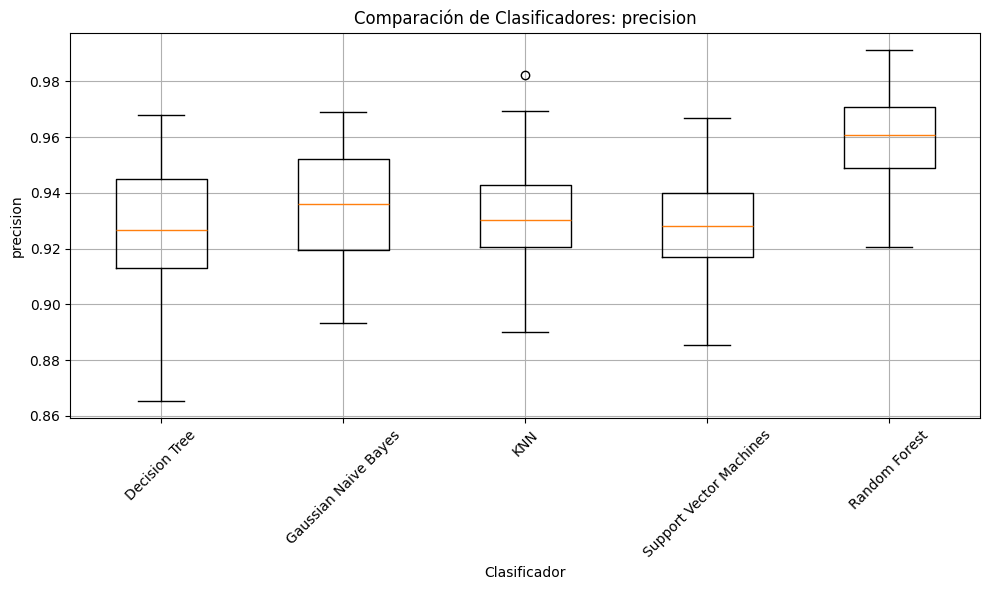

C:\Users\aleja\AppData\Local\Temp\ipykernel_13400\1801643465.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(precision_data, labels=results.keys())


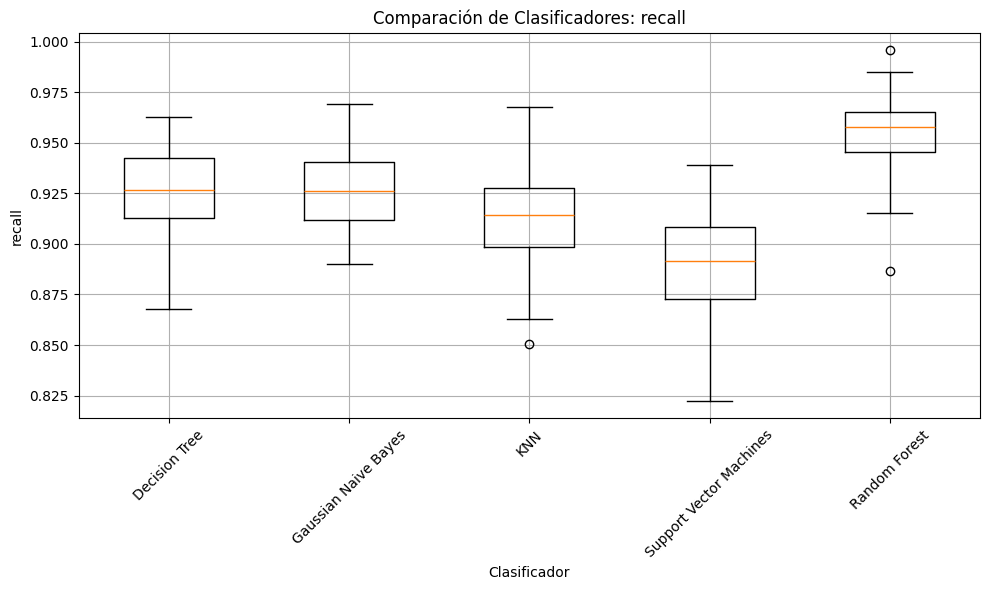

C:\Users\aleja\AppData\Local\Temp\ipykernel_13400\1801643465.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(precision_data, labels=results.keys())


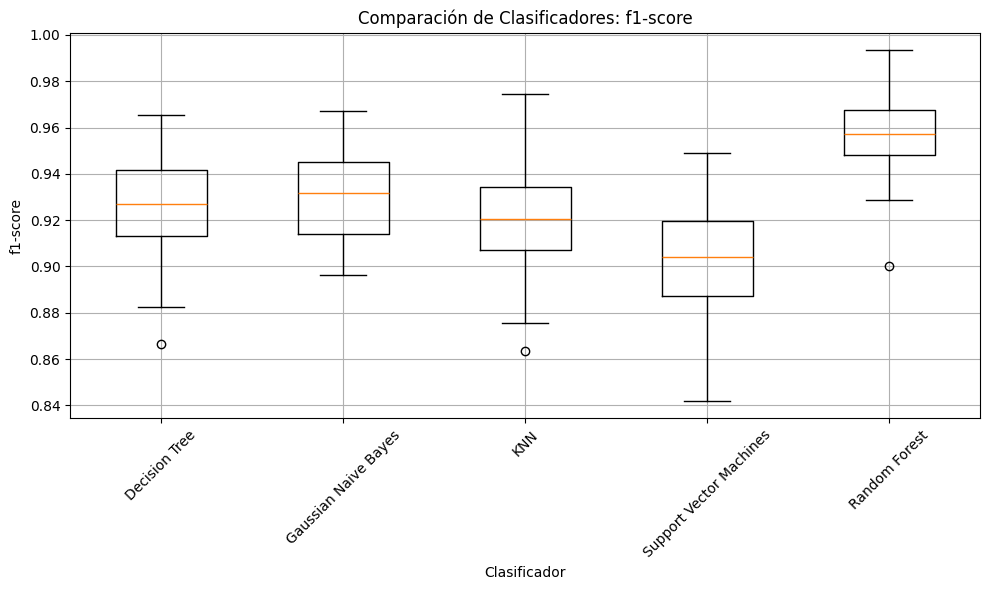

In [ ]:
def plot_precision(results, metric):
    # Extraer los datos de precisión para cada clasificador
    precision_data = [results[name][metric] for name in results.keys()]

    # Crear el gráfico de caja para precisión
    plt.figure(figsize=(10, 6))
    plt.boxplot(precision_data, labels=results.keys())
    plt.grid(True)
    plt.title(f'Comparación de Clasificadores: {metric}')
    plt.xlabel('Clasificador')
    plt.ylabel(metric)

    # Mejorar la visualización
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar los resultados de precisión
plot_precision(results, 'precision')
plot_precision(results, 'recall')
plot_precision(results, 'f1-score')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenamiento del modelo
clf_pipeline.fit(X_train, y_train)

# Predicción y métricas en el conjunto de validación
y_val_pred = clf_pipeline.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy en validación: {accuracy:.4f}")
print(f"Precision en validación: {precision:.4f}")
print(f"Recall en validación: {recall:.4f}")
print(f"F1 Score en validación: {f1:.4f}")


Accuracy en validación: 0.9991
Precision en validación: 0.9231
Recall en validación: 0.0805
F1 Score en validación: 0.1481


# SUBSAMPLING

In [ ]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Crear el undersampler para reducir la clase mayoritaria
undersampler = RandomUnderSampler(random_state=42)

# Aplicar undersampling
X_train_subsampled, y_train_subsampled = undersampler.fit_resample(X_train, y_train)

print("Distribución después de subsampling:")
print(y_train_subsampled.value_counts())


Distribución después de subsampling:
Is Fraud?
False    694
True     694
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Supón que 'X' y 'y' son tus datos originales (sin balancear)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplica oversampling o undersampling SOLO en los datos de entrenamiento
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Entrena el modelo con el conjunto de datos balanceado
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_balanced, y_train_balanced)

# Realiza predicciones en el conjunto de prueba (sin balancear)
y_pred = modelo.predict(X_test)

# Calcula las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Métricas de Evaluación en el Conjunto de Prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Métricas de Evaluación en el Conjunto de Prueba:
Accuracy: 0.9993
Precision: 0.9425
Recall: 0.2752
F1 Score: 0.4260


In [ ]:
%pip install costcla


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.0/4.0 MB 16.7 MB/s eta 0:00:01
   ------------- -------------------------- 1.3/4.0 MB 2.8 MB/s eta 0:00:01
   -------------------------- ------------- 2.6/4.0 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  3.9/4.0 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 4.6 MB/s eta 0:00:00
  Created wheel for pyea: filename=pyea-0.2-py3-none-any.whl size=6007 sha256=01ebf4e846f4421e97fc849acde80d0e92e5c1ffeab9964d7ef958d6b858e118
  Stored in directory: c:\users\aleja\appdata\local\pip\cache\wheels\2f\9b\7

In [ ]:
from costcla.models import CostSensitiveRandomForestClassifier

# Definir el clasificador
classifier = CostSensitiveRandomForestClassifier(combination='majority_bmr')

# Entrenar el clasificador usando el conjunto de entrenamiento
classifier.fit(X_train, y_train, cost_mat_train)

# Predecir usando el conjunto de prueba
predictions = classifier.predict(X_test, cost_mat_test)


ModuleNotFoundError: No module named 'sklearn.externals.joblib'